In [13]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("Z:/csv/casos_diagnostico_ccaa.csv")

In [14]:
df = df.dropna(subset = ['num_casos'])
df = df.sample(frac=1)
Y = df['num_casos']
X = df[['num_casos_prueba_pcr']]

In [5]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Coeficientes: ',regr.coef_)
Y_pred = regr.predict(X)
print('R cuadrado: ',r2_score(Y,Y_pred))

Coeficientes:  [1.13505243]
R cuadrado:  0.9268651731121323


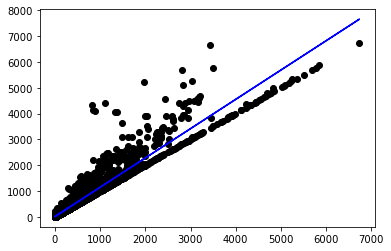

In [6]:
plt.scatter(X[1:10000],Y[1:10000],color='black')
plt.plot(X[1:10000],Y_pred[1:10000],color='blue')
plt.show()

In [16]:
columns = ['num_casos_prueba_pcr','num_casos_prueba_ag','num_casos_test_ac','num_casos_prueba_elisa','num_casos_prueba_desconocida']
dfaux = df.reindex(columns=columns)
dfaux.fillna(0, inplace=True)
dfaux[columns] = dfaux[columns].astype(int)
X = dfaux[['num_casos_prueba_pcr','num_casos_prueba_ag','num_casos_test_ac','num_casos_prueba_elisa','num_casos_prueba_desconocida']]

df['fecha'] = df['fecha'].apply(str)

dummies = pd.get_dummies(data=df[['ccaa_iso','fecha']])
X = dummies.add(X,fill_value=0)

In [17]:
X.columns

Index(['ccaa_iso_AN', 'ccaa_iso_AR', 'ccaa_iso_AS', 'ccaa_iso_CB',
       'ccaa_iso_CE', 'ccaa_iso_CL', 'ccaa_iso_CM', 'ccaa_iso_CN',
       'ccaa_iso_CT', 'ccaa_iso_EX',
       ...
       'fecha_2021-01-14', 'fecha_2021-01-15', 'fecha_2021-01-16',
       'fecha_2021-01-17', 'fecha_2021-01-18', 'num_casos_prueba_ag',
       'num_casos_prueba_desconocida', 'num_casos_prueba_elisa',
       'num_casos_prueba_pcr', 'num_casos_test_ac'],
      dtype='object', length=408)

In [19]:
Y = df['num_casos']
regr = linear_model.LinearRegression()
regr.fit(X, Y)

#print('Coeficientes: ',regr.coef_)
Y_pred = regr.predict(X)
print('R cuadrado: ',r2_score(Y,Y_pred))

R cuadrado:  0.9999655148402989


In [20]:
X = X.add(df[['num_casos']],fill_value=0)

In [21]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

#print('Coeficientes: ',regr.coef_)
Y_pred = regr.predict(X)
print('R cuadrado: ',r2_score(Y,Y_pred))

R cuadrado:  1.0


In [ ]:
#the model was already almost perfect (99%), now it's perfect - probable something is 'wrong'